In this notebook different quantisation methods and distance metrics for Facial Recognition will be compared both on accuracy and execution time. 

The Quantisation methods include:
- Scalar Quantisation
- TensorFlow Quantisation

The distance metrics include:
- Cosine Similarity
- Euclidean Distance

Below are the necassary import to run the code.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress tensorflow warnings https://stackoverflow.com/a/40871012
from deepface import DeepFace
import subprocess
import numpy as np
from decimal import Decimal # for proper rounding
import random
import time
import pandas as pd
from datetime import datetime
import struct
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statistics
import accuracy as ac
import pickle
import quantisations as qt
import basics as bs


# # CONSTANTS
# EXECUTABLE_PATH = "ABY/build/bin"
# INPUT_FILE_NAME = "input_vecs.txt"
# EXECUTABLE_NAME_SCENARIO = 'cos_dist_copy'
# CMD_SCENARIO = f"./{EXECUTABLE_NAME_SCENARIO} -r 1 -f {INPUT_FILE_NAME} & (./{EXECUTABLE_NAME_SCENARIO} -r 0 -f {INPUT_FILE_NAME} 2>&1 > /dev/null)"

# random number generator
rng = np.random.default_rng()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/teresaferreira/Documents/uni/information security/Year 1/Semester 2/Block 2B/2IMS00/Privacy-Friendly Face Recognition On Contrained Devices/Privacy-Friendly Face Recognition On Contrained Devices Github/myenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gw/yph26v_x6z548w5q0lj4qk180000gn/T/ipykernel_28585/1841722575.py", line 5, in <module>
    import numpy as np
  File "/Users/teresaferreira/Documents/uni/information security/Year 1/Semester 2/Block 2B/2IMS00/Privacy-Friendly Face Recognition On Contrained Devices/Privacy-Friendly Face Recognition On Contrained Devices Github/myenv/lib/python3.12/site-packages/numpy/__init__.py", line 105, in <module>
    from ._globals import _NoValue, _CopyMode
  File "/Users/teresaferreira/Documents/uni/information security/Year 1/Semester 2/Block 2B/2IMS00/Privacy-Friendly Face Recogn

Here we test if quantisation works

In [ ]:
embedding1 = bs.get_embedding("lfw/George_W_Bush/George_W_Bush_0001.jpg")
embedding2 = bs.get_embedding("lfw/George_W_Bush/George_W_Bush_0002.jpg")
bs.get_cos_dist_numpy(embedding1, embedding2)
# print(embedding1)
embedding1_quant=qt.scalar_quantisation_percentile(embedding1)
embedding2_quant=qt.quantize_tensor(embedding2)
print("size before scalar quantisation:" ,sys.getsizeof(embedding1), ", size after scalar quantisation:",sys.getsizeof(embedding1_quant)) 
print("size before tensor quantisation:", sys.getsizeof(embedding2), ", size after tensor quantisation:",sys.getsizeof(embedding2_quant)) 
print("the type of the elements in the scalar quantisation is:", type(embedding1_quant[0]), "in the non quantised embedding it was:",type(embedding1[0]))
print("the type of the elements in the tensor quantisation is:", type(embedding2_quant[0]), "in the non quantised embedding it was:",type(embedding2[0]))

Below are two functions to compare Facenet and Sface accuracy. One for Euclidean Distance and one for Cosine Similarity. The code to create a visual representation for this comparison is also included.

In [ ]:
# ### GENERATING THE GLOBAL PAIRS. 
# ### we only need to run this once and then we can have the file and use pairs as the list of embeddings 
# ### uncomment to use for first them, then use the next cell!

# #
# # Generate pairs globally
# def generate_pairs(m):
#     pairs = []
#     for _ in range(m):
#         print(_)
#         n = random.choice([True, False])
#         a, b, imga, imgb = bs.get_two_random_embeddings_facenet(same_person=n)
#         pairs.append((a, b, imga, imgb,n))
#     return pairs

# m = 1000
# pairs = generate_pairs(m)

# # Save pairs to a file
# with open('embedingpairs.pkl', 'wb') as file:
#     pickle.dump(pairs, file)

In [ ]:
with open('embedingpairs.pkl', 'rb') as file:
    pairs = pickle.load(file)

In [ ]:
# Quantization functions to test
quantization_functions = {
    "scalar_quantisation_max": qt.scalar_quantisation_max,
    "scalar_quantisation_percentile": qt.scalar_quantisation_percentile,
    "scalar_quantisation_tensorrt": qt.scalar_quantisation_tensorrt
}

In [5]:
# Use Euclidean distance
euclidean_results = ac.compare_accuracies_euc(pairs)





In [6]:
# Use Euclidean distance
cosine_results = ac.compare_accuracies_cos(pairs)





In [7]:
print("facenet euclidean - correct :", correct_f_euc, "incorrect:", incorrect_f_euc)
print("sface euclidean - correct:", correct_s_euc, "incorrect:", incorrect_s_euc)

print("facenet cosine - correct :", correct_f_cos, "incorrect:", incorrect_f_euc)
print("sface cosine - correct:", correct_s_cos, "incorrect:", incorrect_s_cos)

facenet euclidean - correct : [460, 460, 460] incorrect: [540, 540, 540]
sface euclidean - correct: [460, 460, 460] incorrect: [540, 540, 540]
facenet cosine - correct : [895, 879, 870] incorrect: [540, 540, 540]
sface cosine - correct: [903, 895, 881] incorrect: [97, 105, 119]


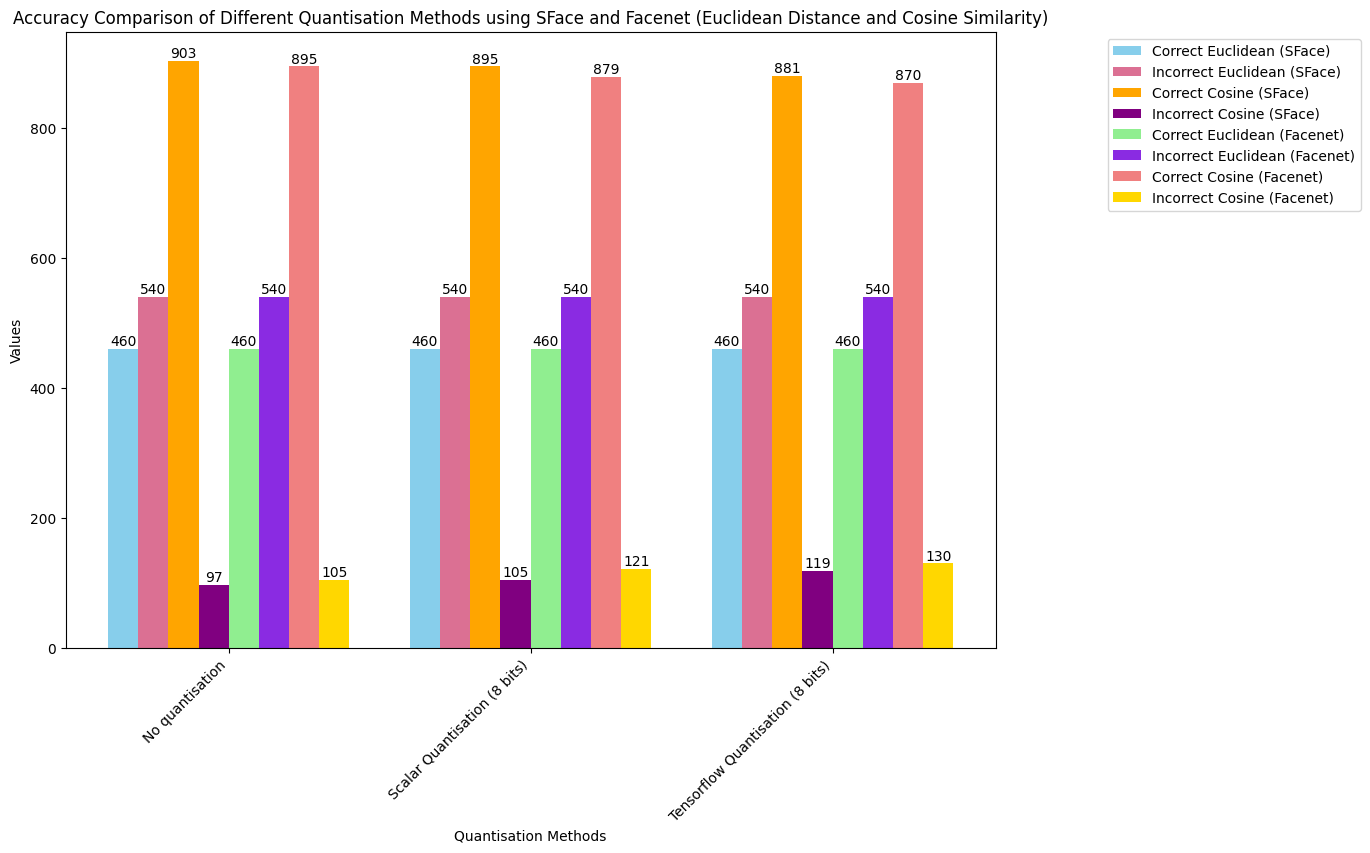

In [13]:
# Create visualisation for ED

# Data
methods = ['No quantisation', 'Scalar Quantisation (8 bits)', 'Tensorflow Quantisation (8 bits)']
correct_sface_euc = correct_s_euc
incorrect_sface_euc = incorrect_s_euc
correct_sface_cos = correct_s_cos
incorrect_sface_cos = incorrect_s_cos
correct_facenet_euc = correct_f_euc
incorrect_facenet_euc = incorrect_f_euc
correct_facenet_cos = correct_f_cos
incorrect_facenet_cos = incorrect_f_cos

# Number of methods
n_methods = len(methods)

# Position of bars on X axis
ind = np.arange(n_methods)

# Width of a bar 
width = 0.1       

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plots for SFace Euclidean
bar1 = ax.bar(ind - width * 3.5, correct_sface_euc, width, label='Correct Euclidean (SFace)', color='skyblue')
bar2 = ax.bar(ind - width * 2.5, incorrect_sface_euc, width, label='Incorrect Euclidean (SFace)', color='palevioletred')

# Bar plots for SFace Cosine
bar3 = ax.bar(ind - width * 1.5, correct_sface_cos, width, label='Correct Cosine (SFace)', color='orange')
bar4 = ax.bar(ind - width * 0.5, incorrect_sface_cos, width, label='Incorrect Cosine (SFace)', color='purple')

# Bar plots for Facenet Euclidean
bar5 = ax.bar(ind + width * 0.5, correct_facenet_euc, width, label='Correct Euclidean (Facenet)', color='lightgreen')
bar6 = ax.bar(ind + width * 1.5, incorrect_facenet_euc, width, label='Incorrect Euclidean (Facenet)', color='blueviolet')

# Bar plots for Facenet Cosine
bar7 = ax.bar(ind + width * 2.5, correct_facenet_cos, width, label='Correct Cosine (Facenet)', color='lightcoral')
bar8 = ax.bar(ind + width * 3.5, incorrect_facenet_cos, width, label='Incorrect Cosine (Facenet)', color='gold')

# Adding text labels for all bars
for bars in [bar1, bar2, bar3, bar4, bar5, bar6, bar7, bar8]:
    for i, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

# Labels, title and axes ticks
ax.set_xlabel('Quantisation Methods')
ax.set_ylabel('Values')
ax.set_title('Accuracy Comparison of Different Quantisation Methods using SFace and Facenet (Euclidean Distance and Cosine Similarity)')
ax.set_xticks(ind)
ax.set_xticklabels(methods, rotation=45, ha='right')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# Display the plot
plt.show()


below will be the functions to compare the execution time of (Facenet, SFace) x (Euclidean, Cosine) X (no quantisation, Tensorflow, scalar)

In [18]:
# Define your experiments
experiments = [
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": None, "distance_func": bs.get_cos_dist_numpy, "quantize": False},
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": None, "distance_func": bs.euclidean_distance, "quantize": False},
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": qt.scalar_quantisation_percentile, "distance_func": bs.get_cos_dist_numpy, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": qt.scalar_quantisation_percentile, "distance_func": bs.euclidean_distance, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": qt.quantize_tensor, "distance_func": bs.get_cos_dist_numpy, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding_facenet, "quantize_func": qt.quantize_tensor, "distance_func": bs.euclidean_distance, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": None, "distance_func": bs.get_cos_dist_numpy, "quantize": False},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": None, "distance_func": bs.euclidean_distance, "quantize": False},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": qt.scalar_quantisation_percentile, "distance_func": bs.get_cos_dist_numpy, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": qt.scalar_quantisation_percentile, "distance_func": bs.euclidean_distance, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": qt.quantize_tensor, "distance_func": bs.get_cos_dist_numpy, "quantize": True},
    {"n": 1000, "get_embedding_func": bs.get_embedding, "quantize_func": qt.quantize_tensor, "distance_func": bs.euclidean_distance, "quantize": True},
]

In [23]:
def run_experiment(n, get_embedding_func, quantize_func, distance_func, quantize=False):
    execution_times = []

    for _ in range(n):
        a, b, imga, imgb,n = pairs[_]
        start_time = time.time()
        a = get_embedding_func(imga)
        b = get_embedding_func(imgb)
        
        if quantize:
            a = quantize_func(a)
            b = quantize_func(b)
        
        if distance_func == bs.get_cos_dist_numpy:
            a = a / np.linalg.norm(a)
            b = b / np.linalg.norm(b)
        
        distance_func(a, b)
        end_time = time.time()

        execution_time = end_time - start_time
        execution_times.append(execution_time)
    
    return execution_times

In [24]:
# Run all experiments
results = {}
for i, experiment in enumerate(experiments):
    key = f"experiment_{i+1}"
    results[key] = run_experiment(**experiment)
    print(f"{key} completed")

experiment_1 completed
experiment_2 completed
experiment_3 completed
experiment_4 completed
experiment_5 completed
experiment_6 completed
experiment_7 completed
experiment_8 completed
experiment_9 completed
experiment_10 completed
experiment_11 completed
experiment_12 completed


In [25]:
# Define a dictionary with experiment names for readability
experiment_names = {
    "experiment_1": "avg_execution_times_no_quantisation_facenet_cos",
    "experiment_2": "avg_execution_times_no_quantisation_facenet_ed",
    "experiment_3": "avg_execution_times_scalar_quantisation_facenet_cos",
    "experiment_4": "avg_execution_times_scalar_quantisation_facenet_ed",
    "experiment_5": "avg_execution_times_tensorflow_quantisation_facenet_cos",
    "experiment_6": "avg_execution_times_tensorflow_quantisation_facenet_ed",
    "experiment_7": "avg_execution_times_no_quantisation_sface_cos",
    "experiment_8": "avg_execution_times_no_quantisation_sface_ed",
    "experiment_9": "avg_execution_times_scalar_quantisation_sface_cos",
    "experiment_10": "avg_execution_times_scalar_quantisation_sface_ed",
    "experiment_11": "avg_execution_times_tensorflow_quantisation_sface_cos",
    "experiment_12": "avg_execution_times_tensorflow_quantisation_sface_ed",
}

In [26]:
# Calculate and print the average execution times
for key, name in experiment_names.items():
    avg_time = statistics.mean(results[key])
    print(f"{name} = {avg_time}")

avg_execution_times_no_quantisation_facenet_cos = 1.0380895459651946
avg_execution_times_no_quantisation_facenet_ed = 0.7725376920700073
avg_execution_times_scalar_quantisation_facenet_cos = 0.6475040144920349
avg_execution_times_scalar_quantisation_facenet_ed = 0.5849039292335511
avg_execution_times_tensorflow_quantisation_facenet_cos = 0.5574558110237121
avg_execution_times_tensorflow_quantisation_facenet_ed = 0.4945537757873535
avg_execution_times_no_quantisation_sface_cos = 0.07012196230888366
avg_execution_times_no_quantisation_sface_ed = 0.08239891648292541
avg_execution_times_scalar_quantisation_sface_cos = 0.07709391808509827
avg_execution_times_scalar_quantisation_sface_ed = 0.07805041313171386
avg_execution_times_tensorflow_quantisation_sface_cos = 0.07432695055007935
avg_execution_times_tensorflow_quantisation_sface_ed = 0.07351775908470154
